In [2]:
from math import sin
from random import random
import pandas as pd
import pickle
import json

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform

data = pd.read_json('data/dataset-000.json')
df_specs = data['specs']
keys = []
for row in df_specs:
    row_keys = list(row.keys())
    keys = keys + row_keys
embed = pickle.load(open('data/key_embeddings0.pkl', 'rb'))

list_x = embed[:, 0]
list_y = embed[:, 1]
desc = keys

source = ColumnDataSource(data=dict(x=list_x, y=list_y, desc=desc))
hover = HoverTool(tooltips=[
    ('desc', '@desc'),
])
mapper = LinearColorMapper(palette=plasma(256), low=min(list_y), high=max(list_y))

p = figure(width=1000, height=1000, tools=[hover])
p.circle('x', 'y', size=10, source=source)

output_notebook()
show(p)

Loading BokehJS ...

# BIRCH

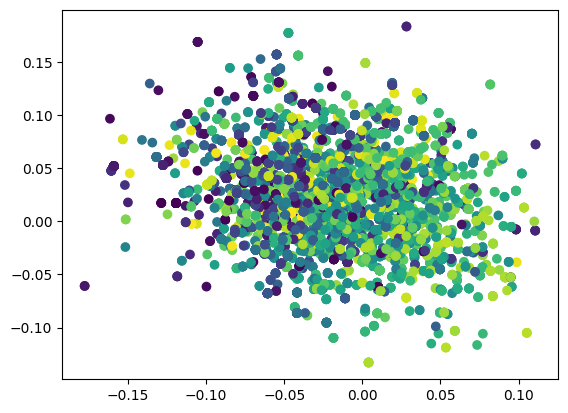

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

brc = Birch(threshold=0.7, n_clusters=None)
brc.fit(embed)

out = brc.fit_predict(embed)

plt.scatter(embed[:,0], embed[:,1], c=out)
plt.show() 

# DBSCAN

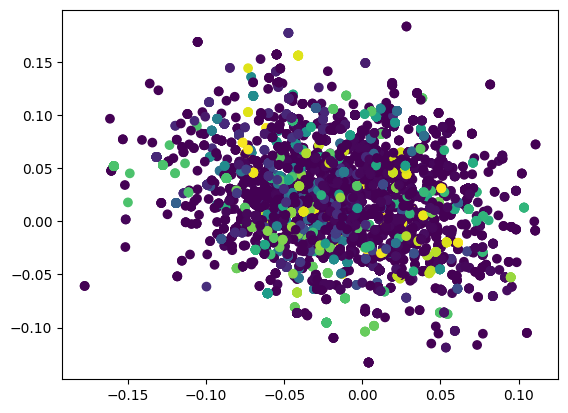

'# Number of clusters in labels, ignoring noise if present.\nn_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)\nn_noise_ = list(labels).count(-1)\n\nprint("Estimated number of clusters: %d" % n_clusters_)\nprint("Estimated number of noise points: %d" % n_noise_)'

In [13]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.8, min_samples=10).fit(embed)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

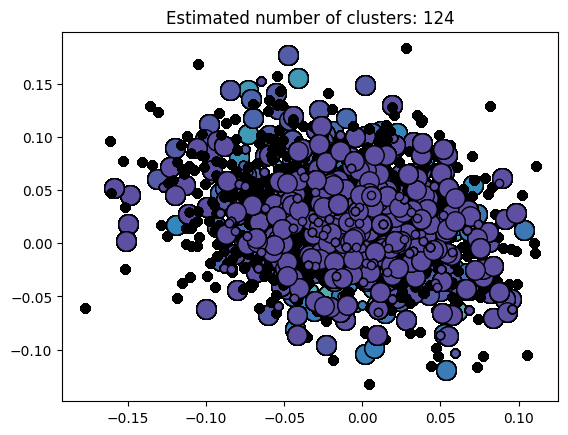

In [7]:
import matplotlib.pyplot as plt 

unique_labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = embed[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = embed[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# AffinityPropagation

In [14]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralCoclustering

ImportError: cannot import name 'BisectingKMeans' from 'sklearn.cluster' (c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\sklearn\cluster\__init__.py)

c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\sklearn\cluster\_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,
c:\Users\Gebruiker\anaconda3\envs\thesis1\lib\site-packages\sklearn\cluster\_affinity_propagation.py:532: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  ConvergenceWarning,


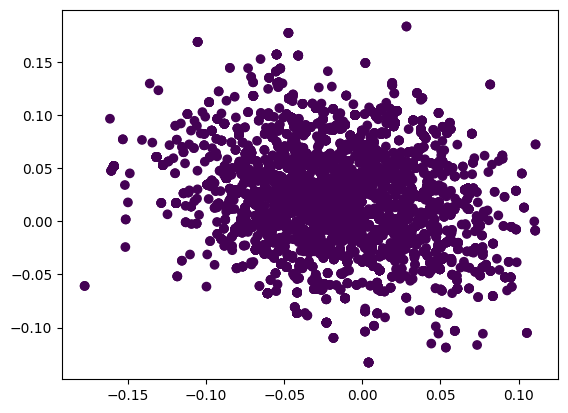

In [6]:
from sklearn.cluster import AffinityPropagation
import numpy as np

ap = AffinityPropagation(random_state=5).fit(embed)

ap.labels_

res = ap.fit_predict(embed)

ap.cluster_centers_

plt.scatter(embed[:,0], embed[:,1], c=res)
plt.show() 

# AgglomerativeClustering

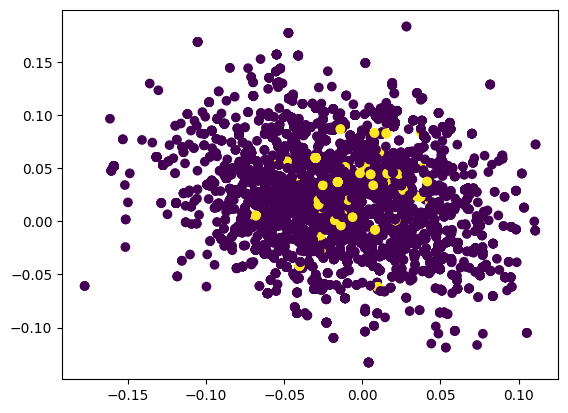

In [10]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

ac = AgglomerativeClustering().fit(embed)

ac.labels_

res = ac.fit_predict(embed)

plt.scatter(embed[:,0], embed[:,1], c=res)
plt.show() 

# Compare algorithms with one function

In [ ]:
def cluster(model, embed):
    md = model.fit(embed)